In [1]:
import matplotlib.pyplot as plt
import qutip as qp
from H_generator import H_generator
from QuIPI_circuit import QuIPI_circuit

In [2]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

# Inilization

In [3]:
H_gen = H_generator() # Hamiltonian generator

In [4]:
QC = QuIPI_circuit() # quantum circuit
s = 10 # squeezing factor
cut = 20
max_cut = 100
QC.set_qumode_para(s, cut, max_cut)

# Process

In [5]:
# The energy decays soon for bond < 0.5
# While solving the case bond < 0.5, we apply a small shift-energy 0.6
# Other wise, the shift-energy is 1.2

E_est_list = [] # store the approximate ground energy
E_exact_list = [] # store the exact ground state energy
bond_list = [] # store bond distance

# initial statate is prepared as |01>-|10>
b = qp.tensor([qp.basis(2)]*2)
b = qp.tensor(qp.sigmax(), qp.qeye(2))*b
b = qp.tensor(qp.snot(), qp.qeye(2))*b
b = qp.tensor(qp.qeye(2), qp.sigmax())*b
b = qp.cnot()*b

K = 3
shift_E = 0.6
for i in range(54):
    if i < 3:
        shift_E = 0.6
    else:
        shift_E = 1.2
    b_d, H = H_gen.build_H2(i, shift_E) # bond distance and Hamiltonian
    E_exact, State_exact = QC.exact_ground_E_and_state(H) # exact energy
    E_exact_list.append(E_exact-shift_E)
    bond_list.append(b_d)
    E_list, state_list = QC.evolution(H, b, K)
    E_est_list.append(E_list[-1]-shift_E)

# Result

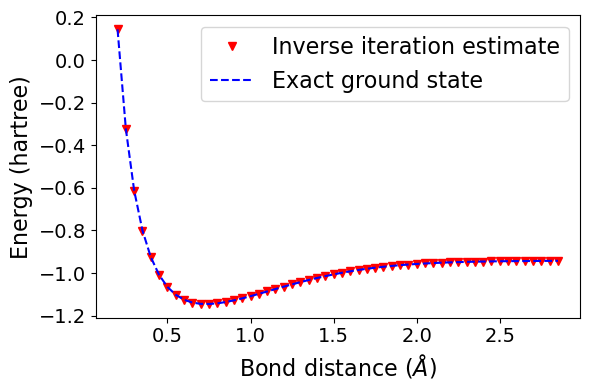

In [6]:
fig = plt.figure(figsize=[6,4])
plt.plot(bond_list, E_est_list, 'rv', label = 'Inverse iteration estimate')
plt.plot(bond_list, E_exact_list, 'b--', label = 'Exact ground state')
plt.xlabel('Bond distance ($\AA$)', fontsize = 16)
plt.ylabel('Energy (hartree)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 16)
plt.tight_layout()
plt.show()